In [18]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\athar\OneDrive\Desktop\python\anime.csv"  # Update the path to your CSV file
df = pd.read_csv(r"C:\Users\athar\OneDrive\Desktop\python\anime.csv")

# Display the first few rows of the dataset
print(df.head())


   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266  


In [32]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [33]:
df['episodes'] = pd.to_numeric(df['episodes'], errors='coerce').fillna(0).astype(int)
df['rating'].fillna(df['rating'].mean(), inplace=True)

In [34]:
df['type'] = df['type'].astype('category').cat.codes

In [35]:
genres = set()
for s in df['genre'].str.split(','):
    genres.update(s)
genres = sorted(genres)

In [36]:
for genre in genres:
    df[f'genre_{genre.strip()}'] = df['genre'].apply(lambda x: 1 if genre in x else 0)

In [37]:
# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

In [38]:
numerical_columns = ['episodes', 'rating', 'members']

In [39]:
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [40]:
print(df.head())

   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre  type  episodes  \
0               Drama, Romance, School, Supernatural     0       0.0   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     5       0.0   
2  Action, Comedy, Historical, Parody, Samurai, S...     5       0.0   
3                                   Sci-Fi, Thriller     5       0.0   
4  Action, Comedy, Historical, Parody, Samurai, S...     5       0.0   

     rating   members  genre_Adventure  genre_Cars  genre_Comedy  ...  \
0  0.924370  0.197872                0           0             0  ...   
1  0.911164  0.782770                1           0             0  ...   
2  0.909964  0.112689                0           0   

In [22]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming 'df' is your DataFrame from Step 1

# Handle missing values
df['episodes'] = pd.to_numeric(df['episodes'], errors='coerce').fillna(0).astype(int)
df['rating'].fillna(df['rating'].mean(), inplace=True)

# Display the count of missing values after handling
print("Missing values after handling:")
print(df.isnull().sum())

# Display the first few rows of the dataset
print(df.head())


Missing values after handling:
anime_id               0
name                   0
genre                  0
type                   0
episodes               0
rating                 0
members                0
genre_Adventure        0
genre_Cars             0
genre_Comedy           0
genre_Dementia         0
genre_Demons           0
genre_Drama            0
genre_Ecchi            0
genre_Fantasy          0
genre_Game             0
genre_Harem            0
genre_Hentai           0
genre_Historical       0
genre_Horror           0
genre_Josei            0
genre_Kids             0
genre_Magic            0
genre_Martial Arts     0
genre_Mecha            0
genre_Military         0
genre_Music            0
genre_Mystery          0
genre_Parody           0
genre_Police           0
genre_Psychological    0
genre_Romance          0
genre_Samurai          0
genre_School           0
genre_Sci-Fi           0
genre_Seinen           0
genre_Shoujo           0
genre_Shoujo Ai        0
genre_Shounen      

In [41]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 50 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   anime_id             12294 non-null  int64  
 1   name                 12294 non-null  object 
 2   genre                12294 non-null  object 
 3   type                 12294 non-null  int8   
 4   episodes             12294 non-null  float64
 5   rating               12294 non-null  float64
 6   members              12294 non-null  float64
 7   genre_Adventure      12294 non-null  int64  
 8   genre_Cars           12294 non-null  int64  
 9   genre_Comedy         12294 non-null  int64  
 10  genre_Dementia       12294 non-null  int64  
 11  genre_Demons         12294 non-null  int64  
 12  genre_Drama          12294 non-null  int64  
 13  genre_Ecchi          12294 non-null  int64  
 14  genre_Fantasy        12294 non-null  int64  
 15  genre_Game           12294 non-null 

In [42]:
print(df.describe())

           anime_id          type      episodes        rating       members  \
count  12294.000000  12294.000000  12294.000000  12294.000000  12294.000000   
mean   14058.221653      3.050512      0.000081      0.576699      0.017818   
std    11455.294701      1.818128      0.009019      0.122100      0.054068   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%     3484.250000      2.000000      0.000000      0.507803      0.000217   
50%    10260.500000      3.000000      0.000000      0.585834      0.001524   
75%    24794.500000      5.000000      0.000000      0.660264      0.009303   
max    34527.000000      5.000000      1.000000      1.000000      1.000000   

       genre_Adventure    genre_Cars  genre_Comedy  genre_Dementia  \
count     12294.000000  12294.000000  12294.000000    12294.000000   
mean          0.190987      0.005857      0.377827        0.019522   
std           0.393095      0.076307      0.484864        0.138355   
min     

In [43]:
print(df.describe(include=['object']))

                           name   genre
count                     12294   12294
unique                    12292    3264
top     Shi Wan Ge Leng Xiaohua  Hentai
freq                          2     885


In [44]:
for column in df.select_dtypes(include=['object']).columns:
    print(f"{column}: {df[column].nunique()} unique values")

name: 12292 unique values
genre: 3264 unique values


In [24]:
from sklearn.preprocessing import MinMaxScaler

# Convert 'type' to numerical representation
df['type'] = df['type'].astype('category').cat.codes

# Create a set of all unique genres
genres = set()
for s in df['genre'].str.split(','):
    genres.update(s)
genres = sorted(genres)

# Create binary encoding for genres
for genre in genres:
    df[f'genre_{genre.strip()}'] = df['genre'].apply(lambda x: 1 if genre in x else 0)

# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# List of numerical columns to normalize
numerical_columns = ['episodes', 'rating', 'members']

# Apply the scaler to the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the transformed dataset
print(df.head())


   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre  type  episodes  \
0               Drama, Romance, School, Supernatural     0       0.0   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     5       0.0   
2  Action, Comedy, Historical, Parody, Samurai, S...     5       0.0   
3                                   Sci-Fi, Thriller     5       0.0   
4  Action, Comedy, Historical, Parody, Samurai, S...     5       0.0   

     rating   members  genre_Adventure  genre_Cars  genre_Comedy  ...  \
0  0.924370  0.197872                0           0             0  ...   
1  0.911164  0.782770                1           0             0  ...   
2  0.909964  0.112689                0           0   

In [25]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Assuming 'df' is your DataFrame after feature extraction and normalization

# Function to recommend anime based on cosine similarity
def recommend_anime(anime_title, df, threshold=0.1, top_n=10):
    # Find index of anime title
    idx = df[df['name'] == anime_title].index
    if len(idx) == 0:
        print(f"Anime '{anime_title}' not found in the dataset.")
        return None
    
    idx = idx[0]  # Take the first index if there are multiple matches
    
    # Select features for cosine similarity calculation
    features = df.drop(['anime_id', 'name', 'genre', 'episodes', 'type', 'rating', 'members'], axis=1)
    
    # Calculate cosine similarity
    similarity_scores = cosine_similarity(features.values, features.values)
    
    # Get similarity scores for the target anime
    sim_scores = list(enumerate(similarity_scores[idx]))
    
    # Sort the anime based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Filter anime below the threshold and excluding itself
    sim_scores = [(i, score) for i, score in sim_scores if score > threshold and i != idx]
    
    # Get indices of top similar anime
    if len(sim_scores) < top_n:
        top_n = len(sim_scores)
    similar_anime_indices = [i for i, score in sim_scores[:top_n]]
    
    # Return recommended anime names
    recommended_anime = df.iloc[similar_anime_indices]['name'].tolist()
    
    return recommended_anime

# Example usage:
anime_title = 'Kimi no Na wa.'
recommendations = recommend_anime(anime_title, df)
print(f"Top 10 anime similar to '{anime_title}':")
print(recommendations)


Top 10 anime similar to 'Kimi no Na wa.':
['Wind: A Breath of Heart OVA', 'Wind: A Breath of Heart (TV)', 'Aura: Maryuuin Kouga Saigo no Tatakai', 'Kokoro ga Sakebitagatterunda.', 'Clannad: After Story - Mou Hitotsu no Sekai, Kyou-hen', 'Angel Beats!: Another Epilogue', 'True Tears', '&quot;Bungaku Shoujo&quot; Memoire', 'Harmonie', 'Kimikiss Pure Rouge']


In [26]:
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame after feature extraction and normalization

# Split the dataset into 80% training and 20% testing
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

print(f"Training set size: {len(train_df)}")
print(f"Testing set size: {len(test_df)}")


Training set size: 9835
Testing set size: 2459


In [31]:
# Example with adjusted actual and recommended lists
actual = ['Kimi no Na wa.', 'Clannad: After Story', 'Toradora!', 'Wind: A Breath of Heart OVA']
recommended = ['Wind: A Breath of Heart OVA', 'Clannad: After Story - Mou Hitotsu no Sekai, Kyou-hen', 'Kokoro ga Sakebitagatterunda.']

precision_value = precision(actual, recommended)
recall_value = recall(actual, recommended)
f1_score_value = f1_score(precision_value, recall_value)

print(f"Precision: {precision_value:.2f}")
print(f"Recall: {recall_value:.2f}")
print(f"F1-score: {f1_score_value:.2f}")


Precision: 0.33
Recall: 0.25
F1-score: 0.29


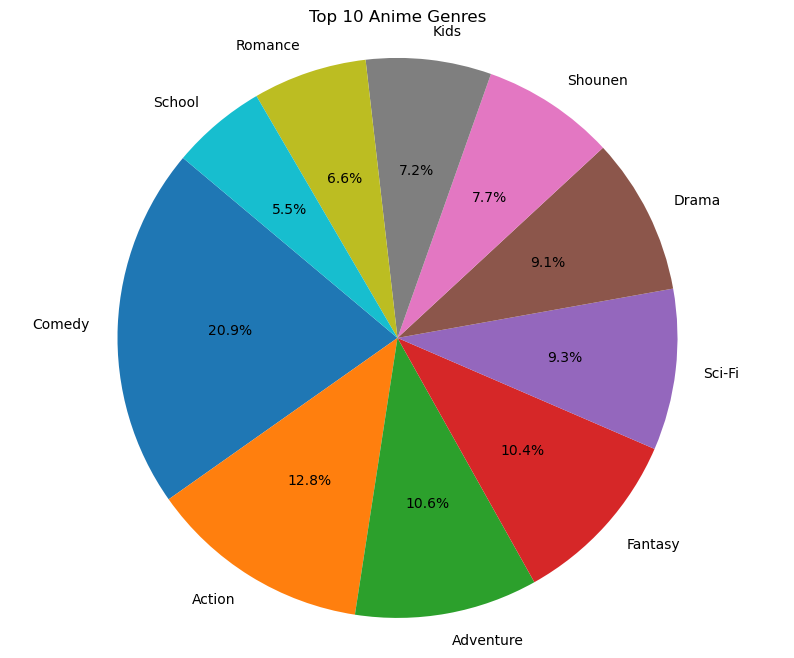

In [45]:
import matplotlib.pyplot as plt
from collections import Counter

# Example data
top_genres = Counter(df['genre'].str.split(', ').explode()).most_common(10)

genres = [genre[0] for genre in top_genres]
counts = [genre[1] for genre in top_genres]

# Plotting genres
plt.figure(figsize=(10, 8))
plt.pie(counts, labels=genres, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Anime Genres')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


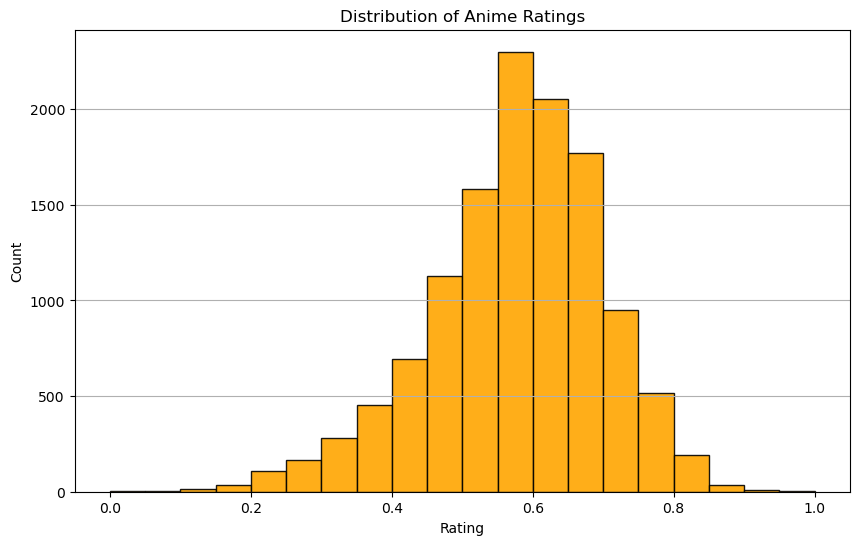

In [53]:
import matplotlib.pyplot as plt

# Example data
ratings = df['rating']

# Plotting ratings distribution
plt.figure(figsize=(10, 6))
plt.hist(ratings, bins=20, color='orange', edgecolor='black', alpha=0.9)
plt.title('Distribution of Anime Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid(axis='y')

plt.show()


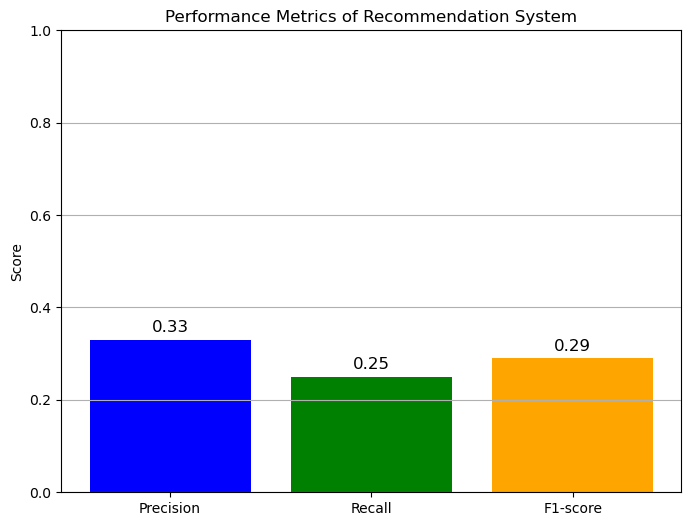

In [54]:
import matplotlib.pyplot as plt

# Example data
metrics = ['Precision', 'Recall', 'F1-score']
scores = [0.33, 0.25, 0.29]  # Replace with your actual scores

# Plotting metrics
plt.figure(figsize=(8, 6))

plt.bar(metrics, scores, color=['blue', 'green', 'orange'])
plt.title('Performance Metrics of Recommendation System')
plt.ylim(0, 1)  # Adjust ylim based on your score range
plt.ylabel('Score')
plt.grid(axis='y')

# Adding text labels
for i, score in enumerate(scores):
    plt.text(i, score + 0.01, f'{score:.2f}', ha='center', va='bottom', fontsize=12)

plt.show()
